In [28]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from librosa.util import fix_length
import os
import json

In [29]:
from google.colab import drive
drive.mount("/content/drive")


os.chdir('/content/drive/My Drive/Colab Notebooks/Skripsi')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Audio

In [ ]:
ikhfa_file = "ikhfa.wav"
idzhar_file = "idzhar.wav"
idgham_file = "idgham.wav"
iqlab_file = "iqlab.wav"

In [ ]:
#load audio
ikhfa, sr = librosa.load(ikhfa_file)

In [ ]:
idzhar, _ = librosa.load(idzhar_file)
idgham, _ = librosa.load(idgham_file)
iqlab, _ = librosa.load(iqlab_file)

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 256

In [ ]:
ikhfa

array([-0.00155018,  0.06605963,  0.13316976, ..., -0.11777902,
       -0.33879107, -0.28166664], dtype=float32)

In [ ]:
sr

22050

In [ ]:
print(len(ikhfa)/sr)

1.735419501133787


In [ ]:
print(librosa.get_duration(y=ikhfa, sr=sr))

1.735419501133787


In [ ]:
np.shape(iqlab)[0]/sr

1.7872562358276645

In [ ]:
np.shape(idgham)[0]/sr

2.2871655328798184

In [ ]:
np.shape(idzhar)[0]/sr

1.0619501133786848

In [ ]:
np.shape(ikhfa)[0]/sr

1.735419501133787

In [ ]:
def padding (signal, sr=sr):
  padded_audio = fix_length(signal, size=3*sr)

  print('Array length before padding', np.shape(signal))
  print('Audio length before padding in seconds', (np.shape(signal)[0]/sr))
  print('Array length after padding', np.shape(padded_audio))
  print("Audio length after padding in seconds", (np.shape(padded_audio)[0]/sr))
  print('\n')
  return padded_audio

In [ ]:
padded_ikhfa = padding(ikhfa)
padded_idzhar = padding(idzhar)
padded_idgham = padding(idgham)
padded_iqlab = padding(iqlab)

Array length before padding (38266,)
Audio length before padding in seconds 1.735419501133787
Array length after padding (66150,)
Audio length after padding in seconds 3.0


Array length before padding (23416,)
Audio length before padding in seconds 1.0619501133786848
Array length after padding (66150,)
Audio length after padding in seconds 3.0


Array length before padding (50432,)
Audio length before padding in seconds 2.2871655328798184
Array length after padding (66150,)
Audio length after padding in seconds 3.0


Array length before padding (39409,)
Audio length before padding in seconds 1.7872562358276645
Array length after padding (66150,)
Audio length after padding in seconds 3.0




In [ ]:
padded_ikhfa

array([-0.00155018,  0.06605963,  0.13316976, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [ ]:
ikhfa

array([-0.00155018,  0.06605963,  0.13316976, ..., -0.11777902,
       -0.33879107, -0.28166664], dtype=float32)

# Plot berbasis waktu

NameError: name 'ikhfa' is not defined

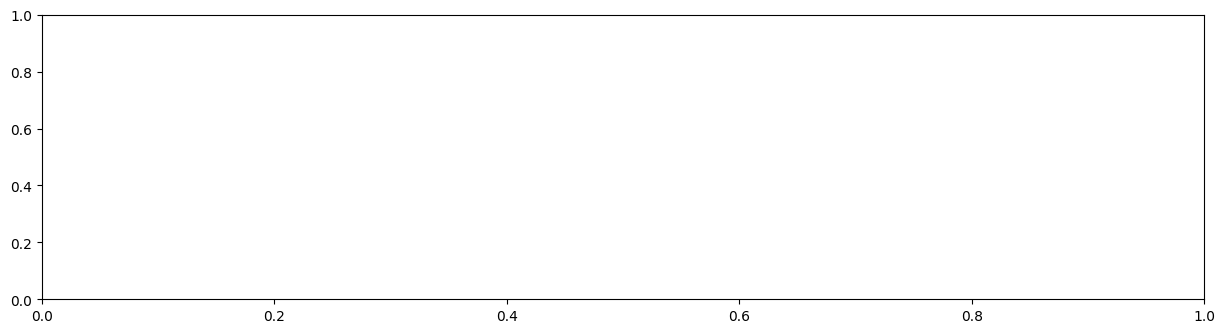

In [ ]:
plt.figure(figsize=(15, 17))

plt.subplot(4, 1, 1)
librosa.display.waveshow(ikhfa, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Ikhfa")

plt.subplot(4, 1, 2)
librosa.display.waveshow(idzhar, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Idzhar")

plt.subplot(4, 1, 3)
librosa.display.waveshow(idgham, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Idgham")

plt.subplot(4, 1, 4)
librosa.display.waveshow(iqlab, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("Time (s)")
plt.title("Iqlab")

plt.show()

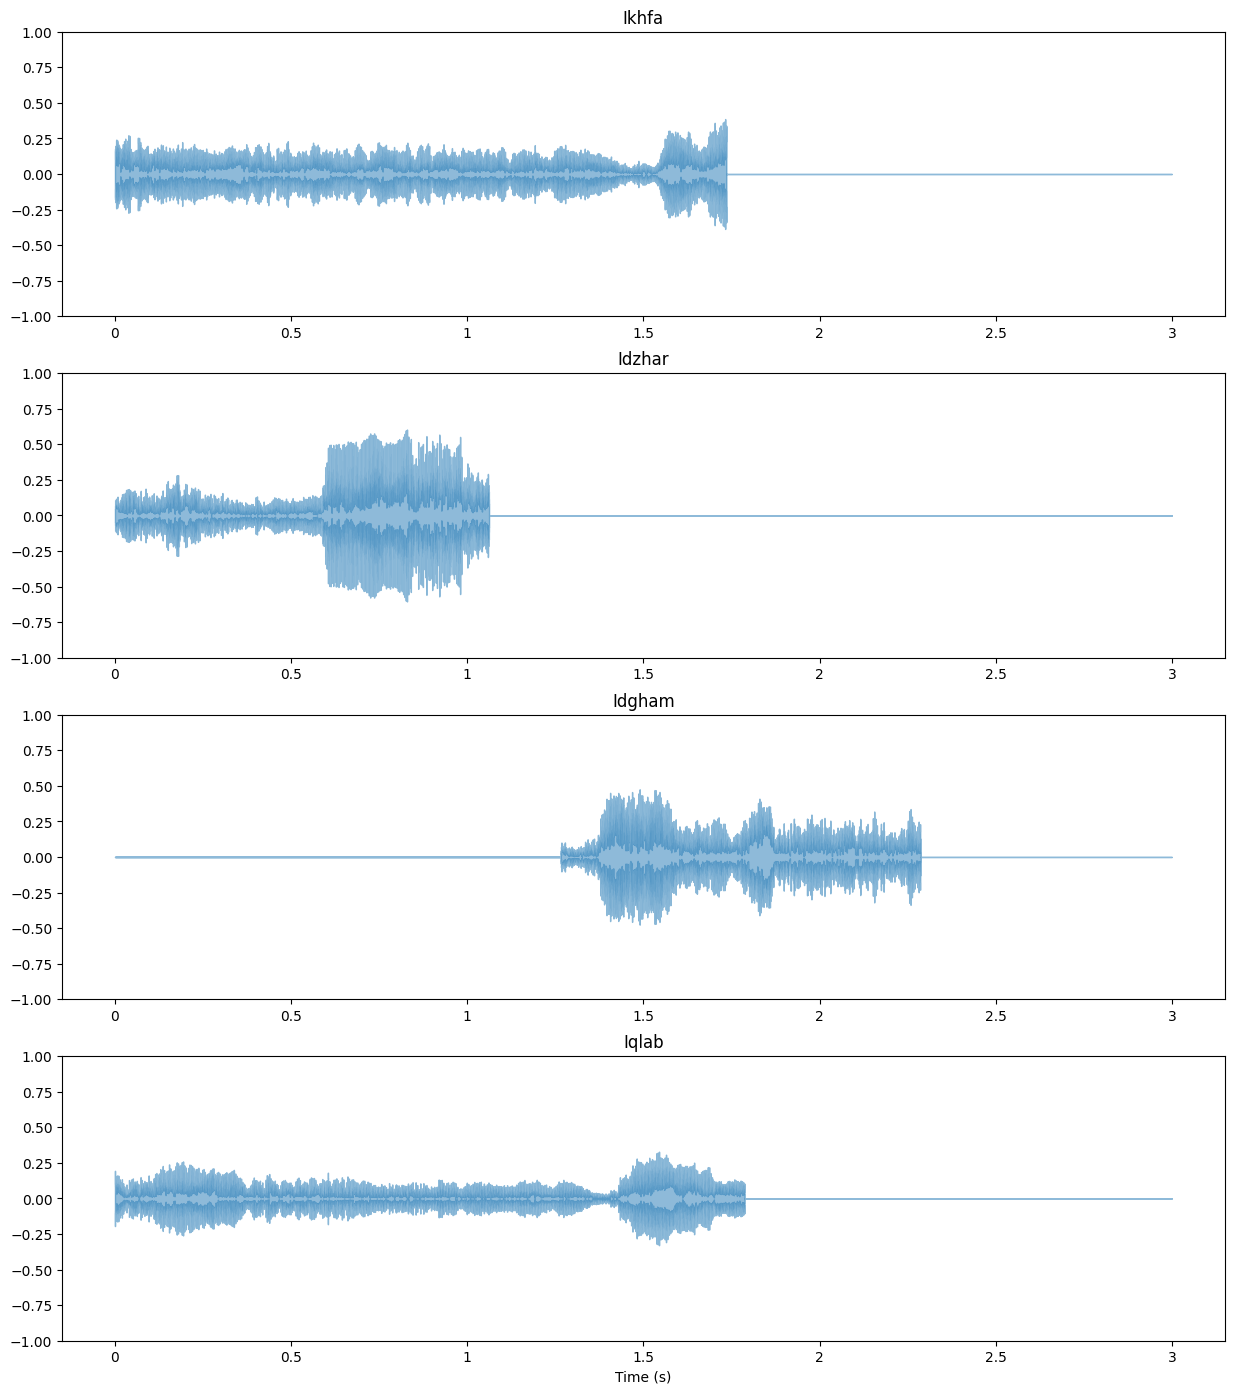

In [ ]:
plt.figure(figsize=(15, 17))

plt.subplot(4, 1, 1)
librosa.display.waveshow(padded_ikhfa, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Ikhfa")

plt.subplot(4, 1, 2)
librosa.display.waveshow(padded_idzhar, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Idzhar")

plt.subplot(4, 1, 3)
librosa.display.waveshow(padded_idgham, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Idgham")

plt.subplot(4, 1, 4)
librosa.display.waveshow(padded_iqlab, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("Time (s)")
plt.title("Iqlab")

plt.show()

# Melakukan Fourier Transform

In [ ]:
#Panggil fungsi fft dari numpy
ikhfa_ft = np.fft.fft(ikhfa)

In [ ]:
ikhfa_ft.shape

(38266,)

In [ ]:
ikhfa_ft[38265]

(-0.008248796133577763+0.0807728296970529j)

In [ ]:
padded_ikhfa_ft = np.fft.fft(padded_ikhfa)

In [ ]:
padded_ikhfa_ft.shape

(66150,)

In [ ]:
padded_ikhfa_ft[66149]

(0.7854145142187239-0.29429639781396716j)

In [ ]:
magnitude_spectrum_ikhfa = np.abs(ikhfa_ft)

In [ ]:
magnitude_spectrum_ikhfa[0]

0.9071847927407362

In [ ]:
len(magnitude_spectrum_ikhfa)

38266

In [ ]:
#Jangan lupa definisi nyquist frekuensi, alasan utama bisa mirorred

def plot_magnitude_spectrum(signal, judul, sr, f_ratio=0.5):
  ft = np.fft.fft(signal)
  mag_spectrum = np.abs(ft)
  print(mag_spectrum)

  frequency = np.linspace(0, sr, len(mag_spectrum))
  frequency_bins = int(len(frequency)*f_ratio)
  print(frequency_bins)
  #plot magnitude spectrum
  plt.figure(figsize=(8, 5))

  plt.plot(frequency[:frequency_bins], mag_spectrum[:frequency_bins])
  plt.xlabel("Frequency (Hz)")
  plt.title(judul)

  plt.show()


[0.90718479 0.08119293 0.22892079 ... 0.391406   0.22892079 0.08119293]
19133


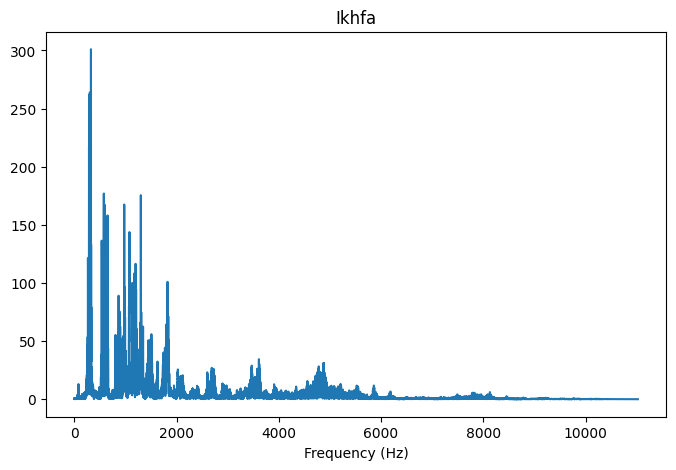

In [ ]:
plot_magnitude_spectrum(ikhfa, "Ikhfa", sr, 0.5)

[0.90718479 0.83874092 0.24908126 ... 0.32427219 0.24908126 0.83874092]
33075


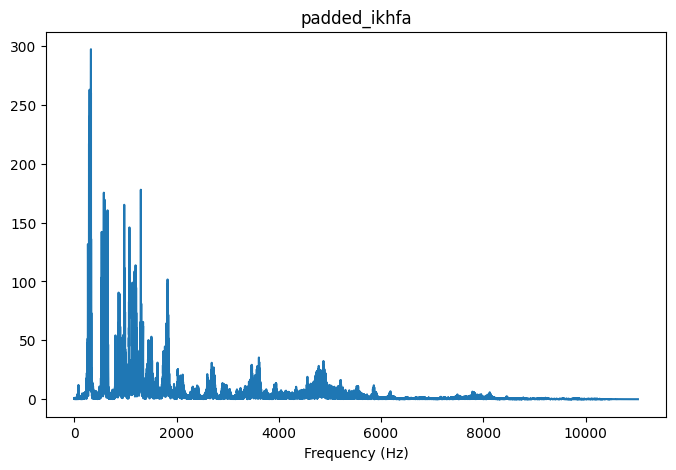

In [ ]:
plot_magnitude_spectrum(padded_ikhfa, "padded_ikhfa",sr, 0.5)

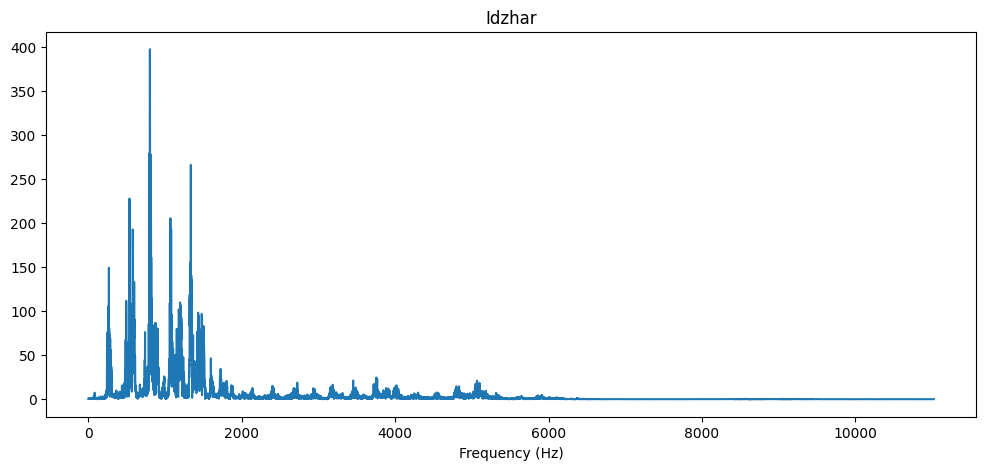

In [ ]:
plot_magnitude_spectrum(idzhar, "Idzhar", sr, 0.5)

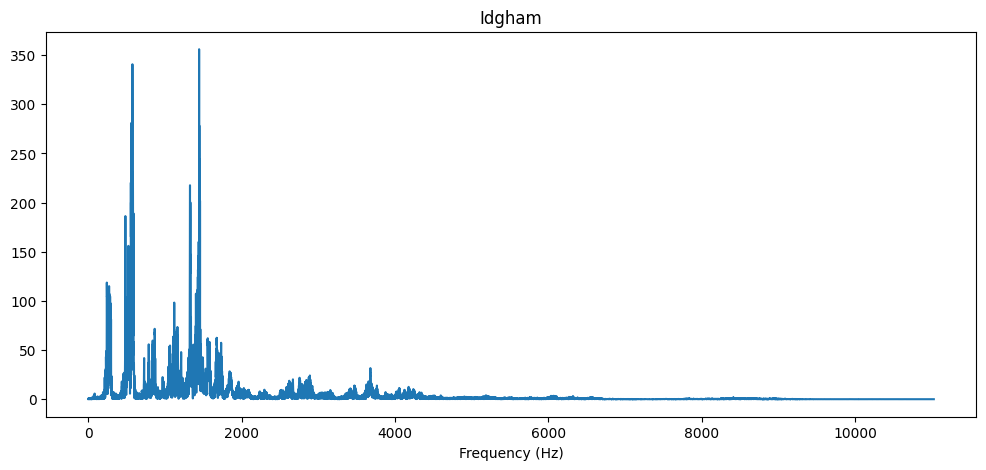

In [ ]:
plot_magnitude_spectrum(idgham, "Idgham", sr, 0.5)

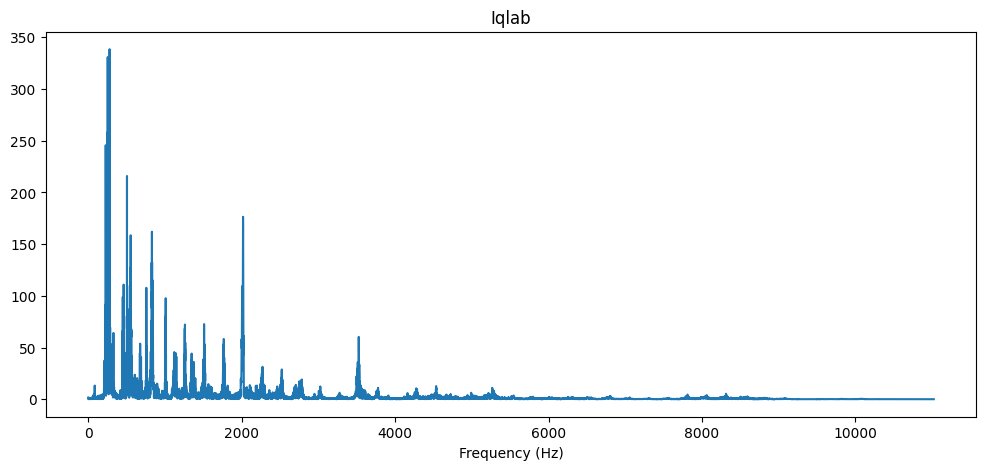

In [ ]:
plot_magnitude_spectrum(iqlab, "Iqlab", sr, 0.5)

# Ekstrak Spektogram

## Contoh Ekstraksi Short-Time Fourier Transform

In [ ]:
s_ikhfa = librosa.stft(ikhfa, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

KeyboardInterrupt: 

In [ ]:
s_ikhfa.shape

In [ ]:
type(s_ikhfa[0][0])


In [ ]:
s_ikhfa[0][0]

In [ ]:
y_ikhfa = np.abs(s_ikhfa) ** 2

In [ ]:
y_ikhfa.shape

In [ ]:
type(y_ikhfa[0][0])

## Menghitung untuk spektogram

In [ ]:
def spectogram (signal, sample_rate, frame_size, hop_size):
  s_signal = librosa.stft(signal, n_fft=frame_size, hop_length=hop_size)

  Y_signal = librosa.power_to_db(np.abs(s_signal)**2)

  plt.figure(figsize=(25, 10))
  librosa.display.specshow(Y_signal,
                             sr=sample_rate,
                             hop_length=hop_size,
                             x_axis="time",
                             y_axis="log")
  plt.colorbar(format="%+2.f")

## Plotting Spectogram

Spectogram Ikhfa

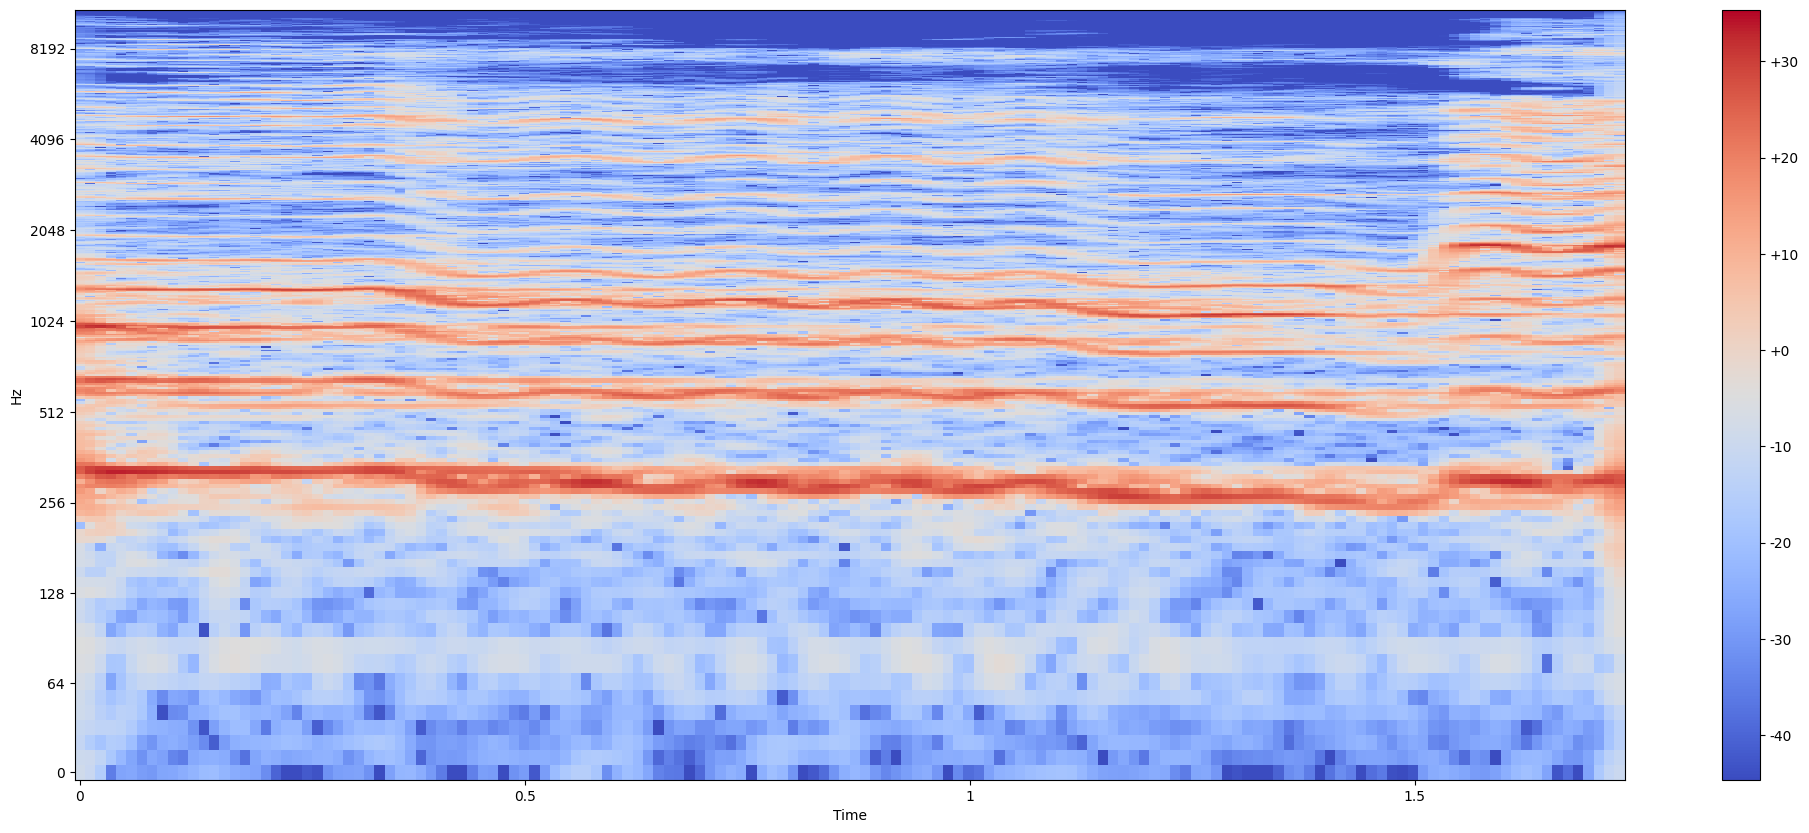

In [ ]:
spectogram(ikhfa, sr, FRAME_SIZE, HOP_SIZE)

Spectogram Idzhar

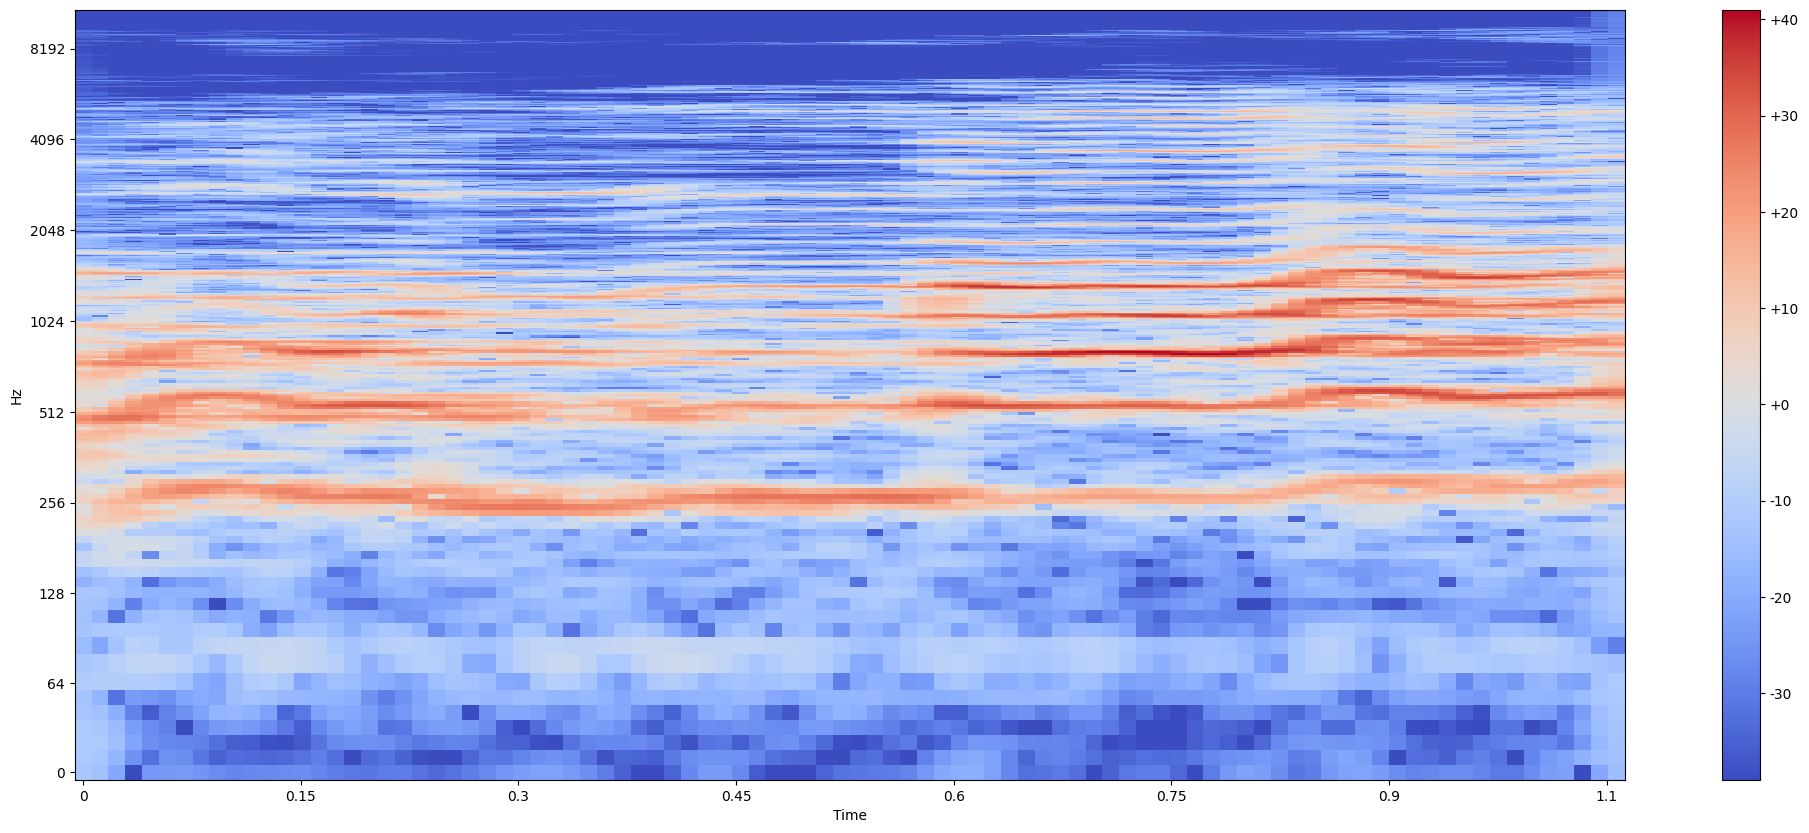

In [ ]:
spectogram(idzhar, sr, FRAME_SIZE, HOP_SIZE)

Spectogram Idgham

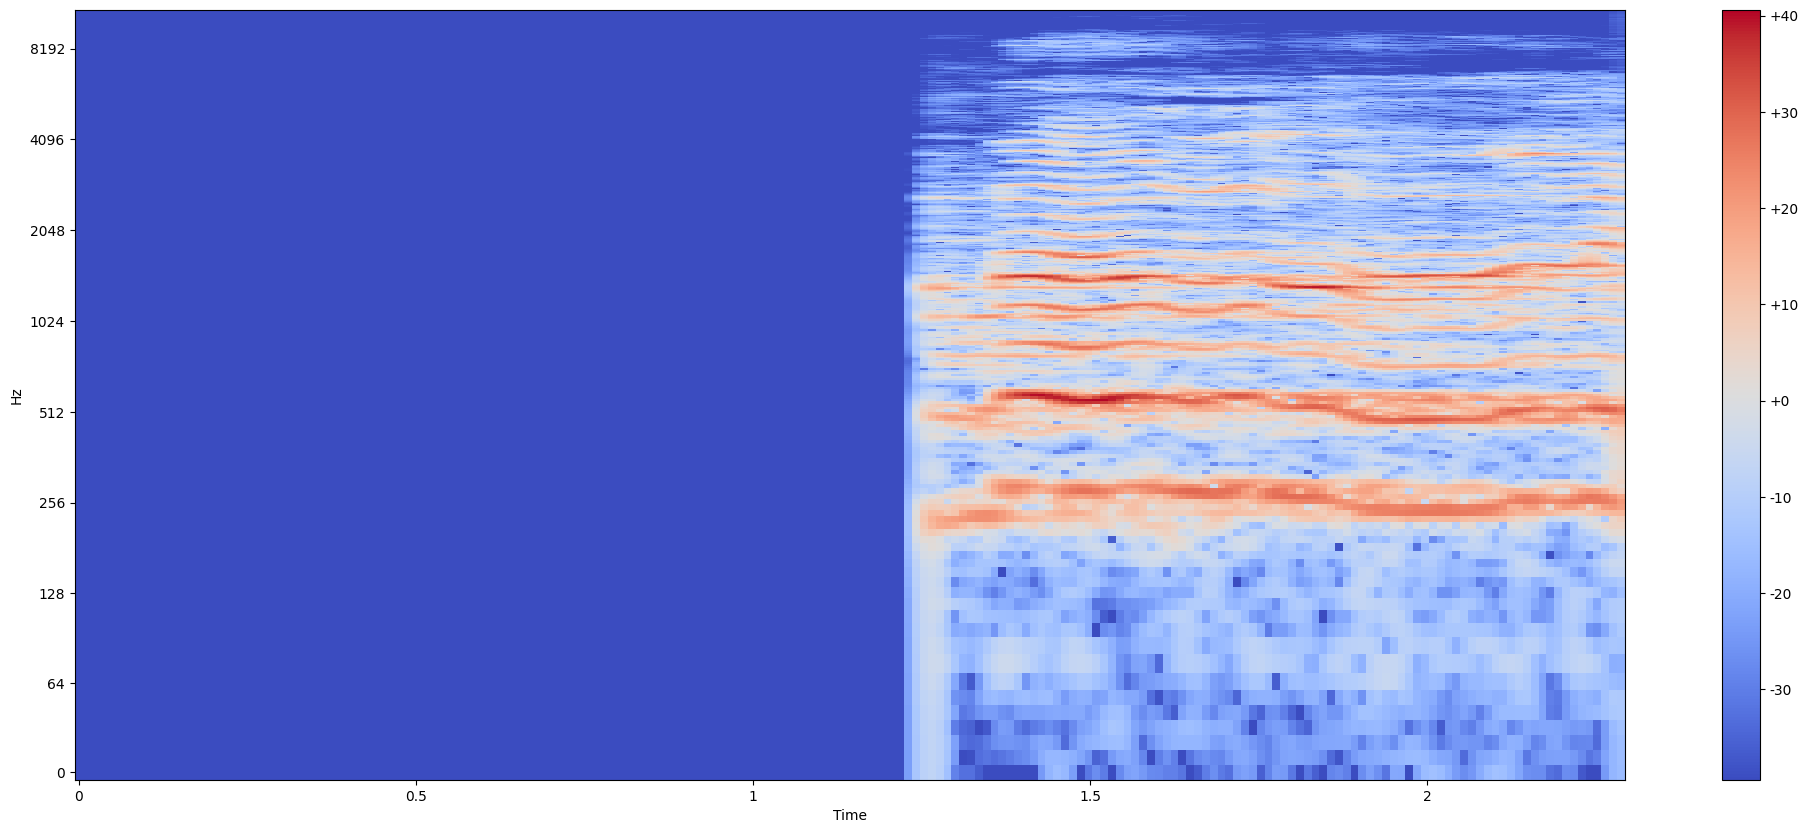

In [ ]:
spectogram(idgham, sr, FRAME_SIZE, HOP_SIZE)

Spectogram Iqlab

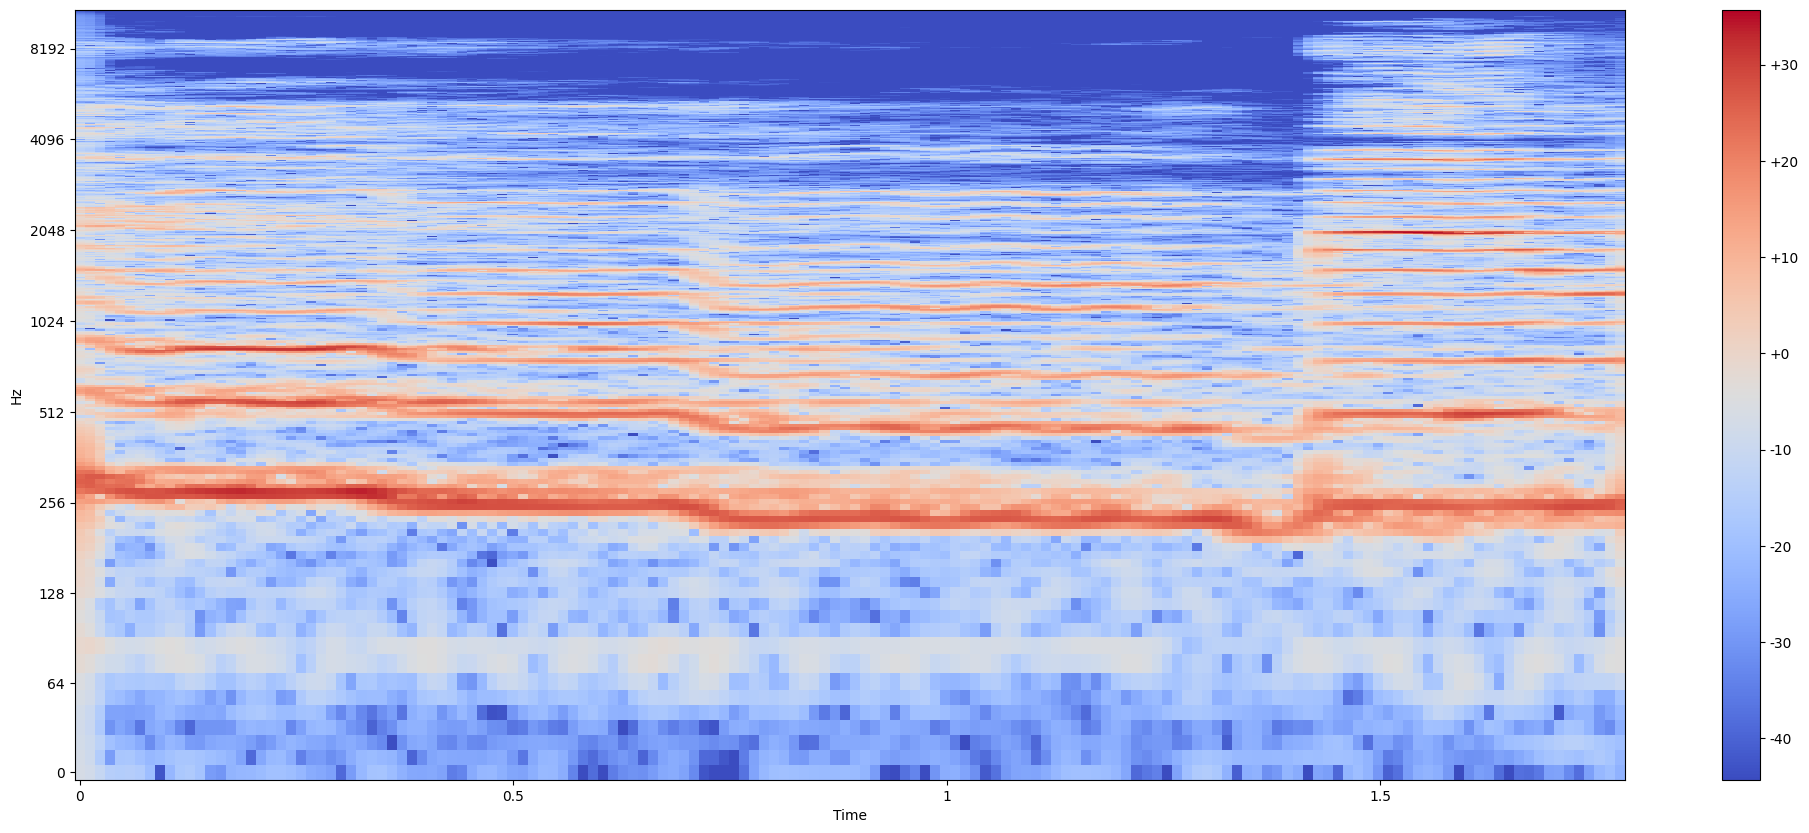

In [ ]:
spectogram(iqlab, sr, FRAME_SIZE, HOP_SIZE)

#Mel Spectogram

In [ ]:
#Menyiapkan mel filter bank
filter_bank = librosa.filters.mel(n_fft=FRAME_SIZE, sr=sr, n_mels=13)

In [ ]:
filter_bank.shape

(64, 1025)

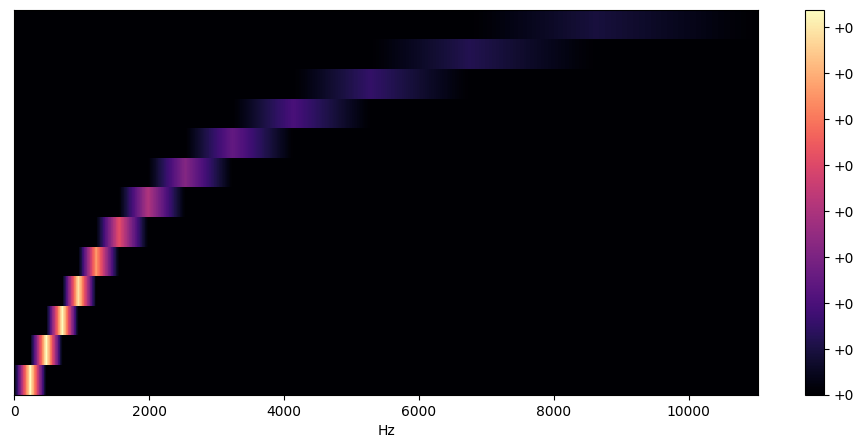

In [ ]:
plt.figure(figsize=(12, 5))
librosa.display.specshow(filter_bank,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
sr = sr_a4

mel_basis = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=13,fmin=0, fmax=sr/2,norm=None)
mels = mel_basis.T

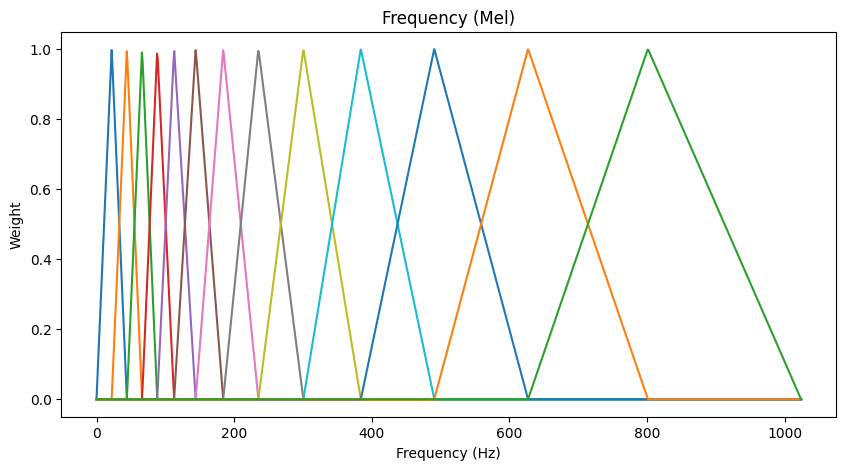

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Frequency (Mel)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Weight")
plt.plot(mels)

In [ ]:
ikhfa.shape

In [ ]:
def mel_f_spectrogram(signal, signal_r=sr, frame_s = FRAME_SIZE, hop_l = HOP_SIZE, n_mels=13):
  mel_spectrogram = librosa.feature.melspectrogram(y=signal,
                                                 sr=signal_r,
                                                 n_fft=frame_s,
                                                 hop_length=hop_l,
                                                 n_mels=n_mels)
  plt.figure(figsize=(13, 5))
  librosa.display.specshow(mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
  plt.colorbar(format="%+2.f")
  plt.show()
  return mel_spectrogram


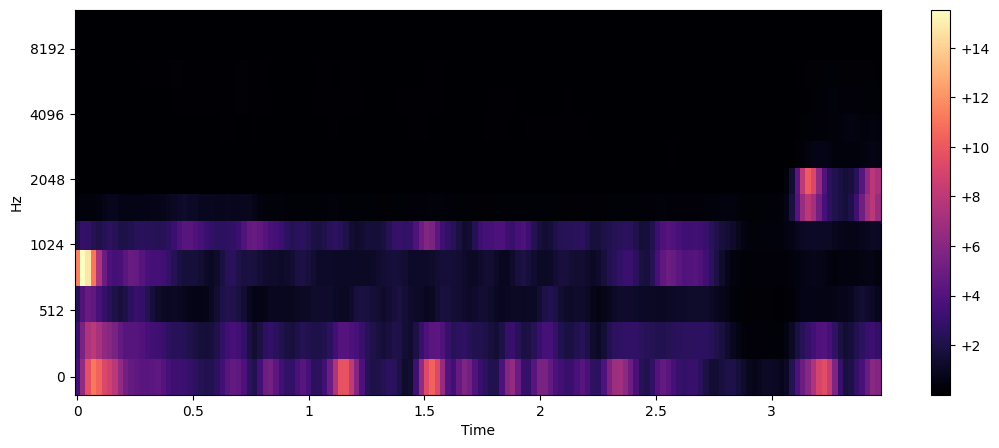

In [ ]:
mel_f_spectrogram(ikhfa)

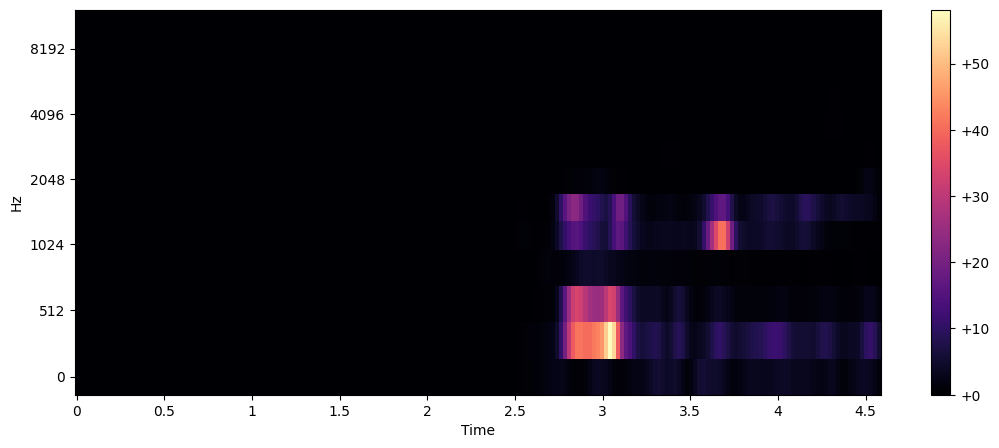

In [ ]:
mel_f_spectrogram(idgham)

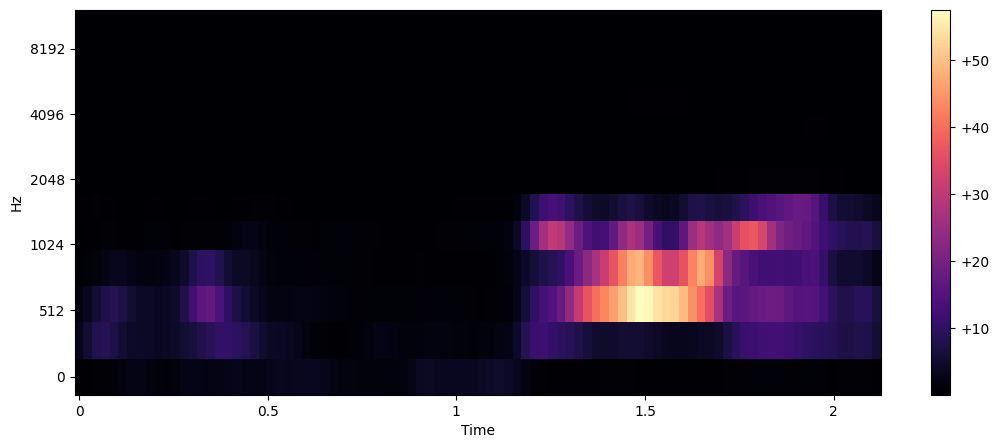

In [ ]:
mel_f_spectrogram(idzhar)

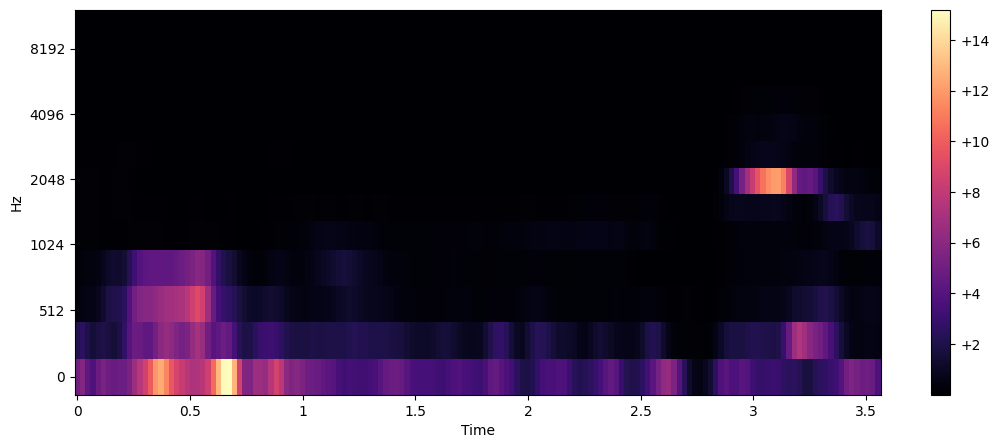

array([[5.00143814e+00, 5.71372128e+00, 4.36438417e+00, ...,
        4.94815874e+00, 4.74159479e+00, 3.75795293e+00],
       [2.16896772e+00, 2.54918242e+00, 2.00927854e+00, ...,
        5.48689842e-01, 5.93330383e-01, 5.03690481e-01],
       [2.97425389e-01, 5.02693594e-01, 5.89513898e-01, ...,
        6.76445901e-01, 7.05374479e-01, 5.79562962e-01],
       ...,
       [1.12730125e-02, 1.49235493e-02, 1.40170800e-02, ...,
        2.23288243e-03, 2.06608954e-03, 1.56105030e-03],
       [9.67738510e-04, 9.36087745e-04, 6.67318760e-04, ...,
        2.32858059e-04, 2.13268213e-04, 1.82107557e-04],
       [8.28947290e-04, 9.54369607e-04, 8.05837219e-04, ...,
        1.84573073e-04, 1.75436333e-04, 1.48767765e-04]], dtype=float32)

In [ ]:
mel_f_spectrogram(iqlab)

In [ ]:
def mel_db_spectrogram(signal, signal_r=sr, frame_s = FRAME_SIZE, hop_l = HOP_SIZE, n_mels=13):
  mel_spectrogram = librosa.feature.melspectrogram(y=signal,
                                                 sr=signal_r,
                                                 n_fft=frame_s,
                                                 hop_length=hop_l,
                                                 n_mels=n_mels)
  mel_spectrogram.shape
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
  plt.figure(figsize=(13, 5))
  librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
  plt.colorbar(format="%+2.f")
  plt.show()
  return log_mel_spectrogram


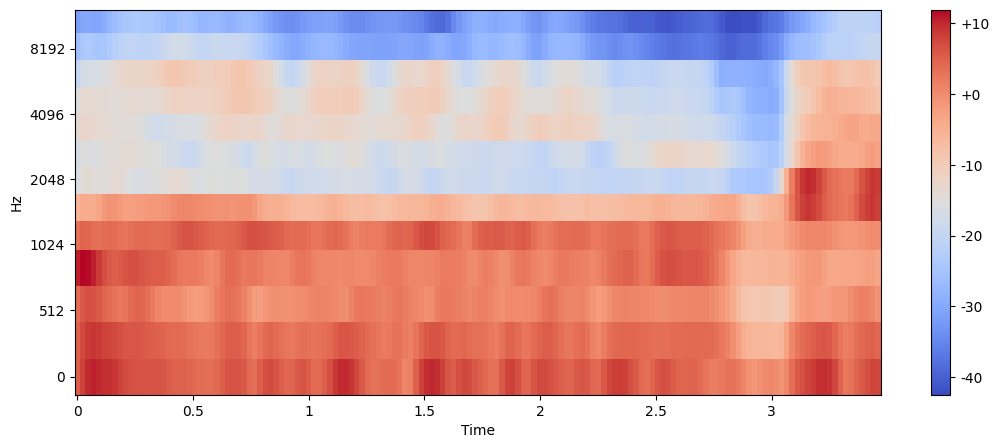

In [ ]:
mel_db_spectrogram(ikhfa)

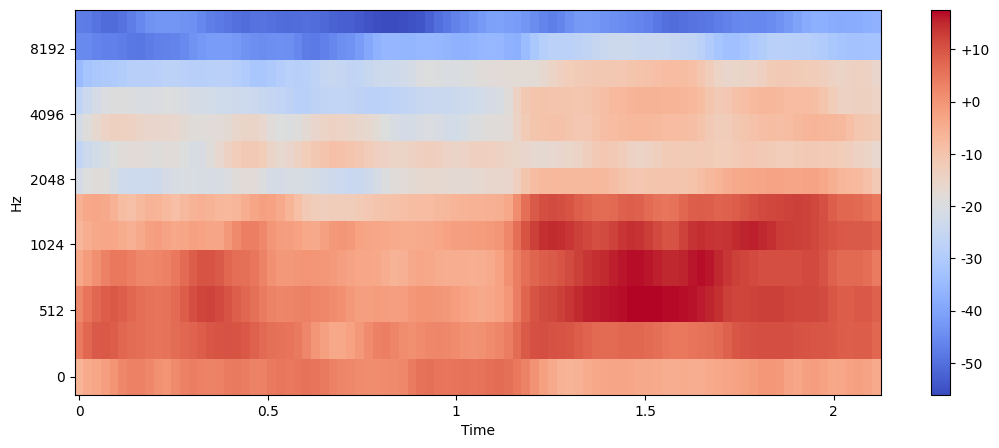

In [ ]:
mel_db_spectrogram(idzhar)


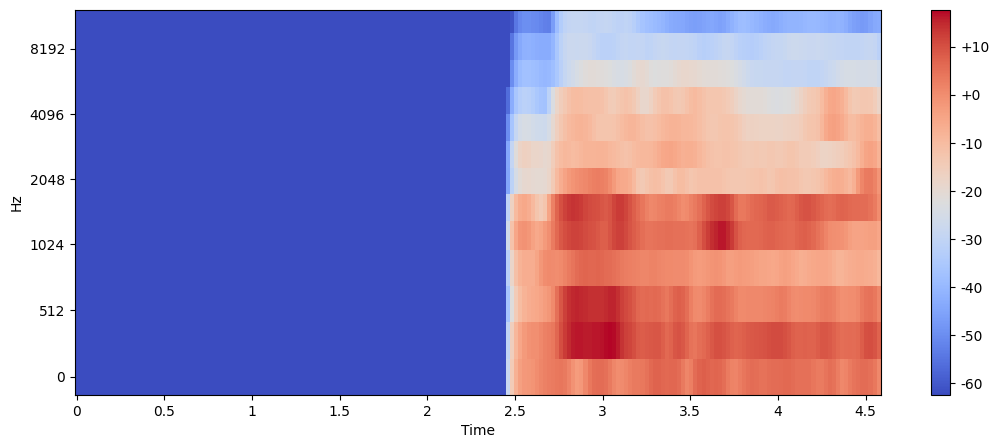

In [ ]:
mel_db_spectrogram(idgham)

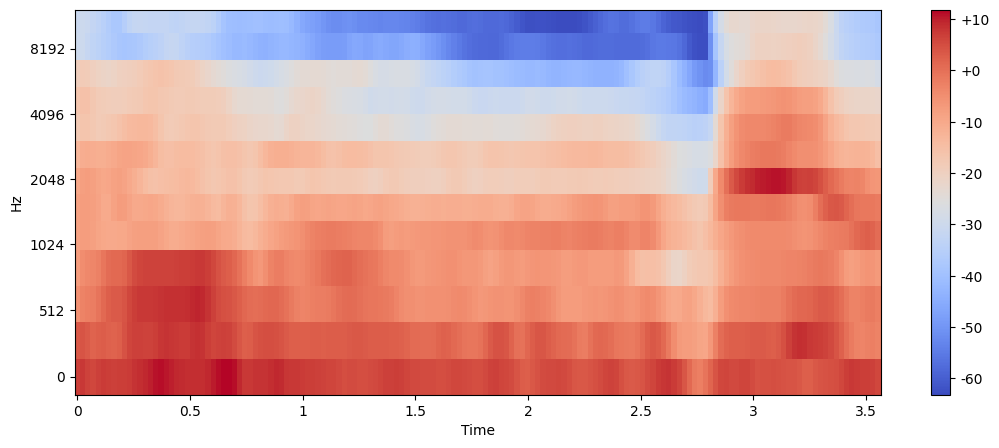

array([[  6.9909487,   7.56919  ,   6.39923  , ...,   6.9444366,
          6.759244 ,   5.7495136],
       [  3.3625307,   4.064009 ,   3.0304015, ...,  -2.6067307,
         -2.2670343,  -2.9783628],
       [ -5.266219 ,  -2.9869666,  -2.2950597, ...,  -1.6976695,
         -1.5158026,  -2.3689938],
       ...,
       [-19.4796   , -18.261278 , -18.533424 , ..., -26.511343 ,
        -26.848509 , -28.065832 ],
       [-30.14242  , -30.286835 , -31.756666 , ..., -36.329086 ,
        -36.71074  , -37.39672  ],
       [-30.814732 , -30.202835 , -30.937527 , ..., -37.338318 ,
        -37.558804 , -38.274914 ]], dtype=float32)

In [ ]:
mel_db_spectrogram(iqlab)

# **MFCC**

In [ ]:
def print_hasil_MFCC (signal, sample_rate=sr, num_mfcc=13, n_fft=FRAME_SIZE, hop_length=HOP_SIZE):
  mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
  #mfcc = mfcc.T

  plt.figure(figsize=(13, 5))
  librosa.display.specshow(mfcc,
                         x_axis="time",
                         sr=sr)
  plt.colorbar(format="%+2.f")
  plt.show()
  return mfcc

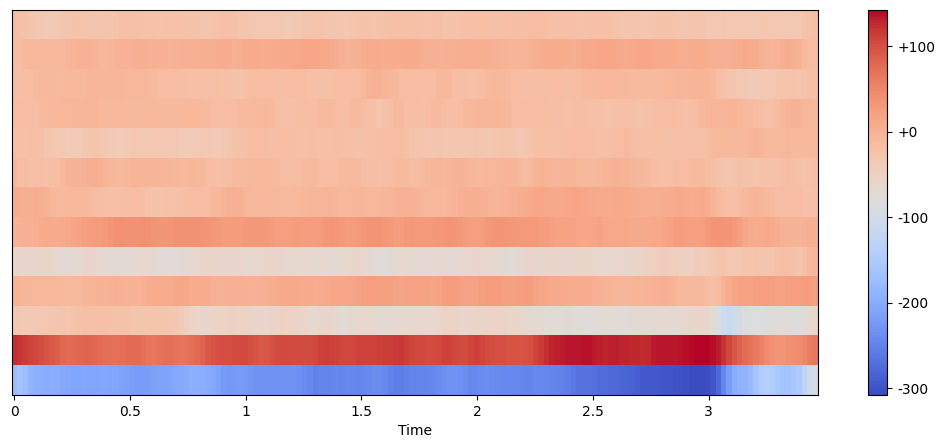

array([[-174.14272 , -165.22118 , -173.74277 , ..., -128.33032 ,
        -105.98603 ,  -99.36803 ],
       [ 123.792564,  119.939835,  114.538864, ...,   50.305523,
          58.72412 ,   63.73201 ],
       [ -32.127296,  -32.796535,  -33.65552 , ...,  -75.83536 ,
         -66.855415,  -60.919617],
       ...,
       [ -17.479511,  -16.172585,  -15.182966, ...,  -22.879442,
         -20.095043,  -17.997543],
       [ -13.302665,  -12.370451,  -10.338404, ...,   -8.428271,
         -12.316063,  -13.744816],
       [ -16.315924,  -18.867813,  -21.633633, ...,  -24.473577,
         -20.76352 ,  -17.018719]], dtype=float32)

In [ ]:
print_hasil_MFCC(ikhfa)

#Plot A4 Piano

In [ ]:
#Load audio
a4, sr_a4 = librosa.load("A4_Piano.wav")

In [ ]:
a4_p, index = librosa.effects.trim(a4)

In [ ]:
a4_p

array([ 8.1712415e-14,  7.4606987e-14,  2.2737368e-13, ...,
       -3.8606902e-03, -2.4603796e-03, -9.0157811e-04], dtype=float32)

In [ ]:
sr_a4

22050

In [ ]:
len(a4_p)/sr_a4

2.8560544217687074

Text(0.5, 1.0, 'A4 Piano')

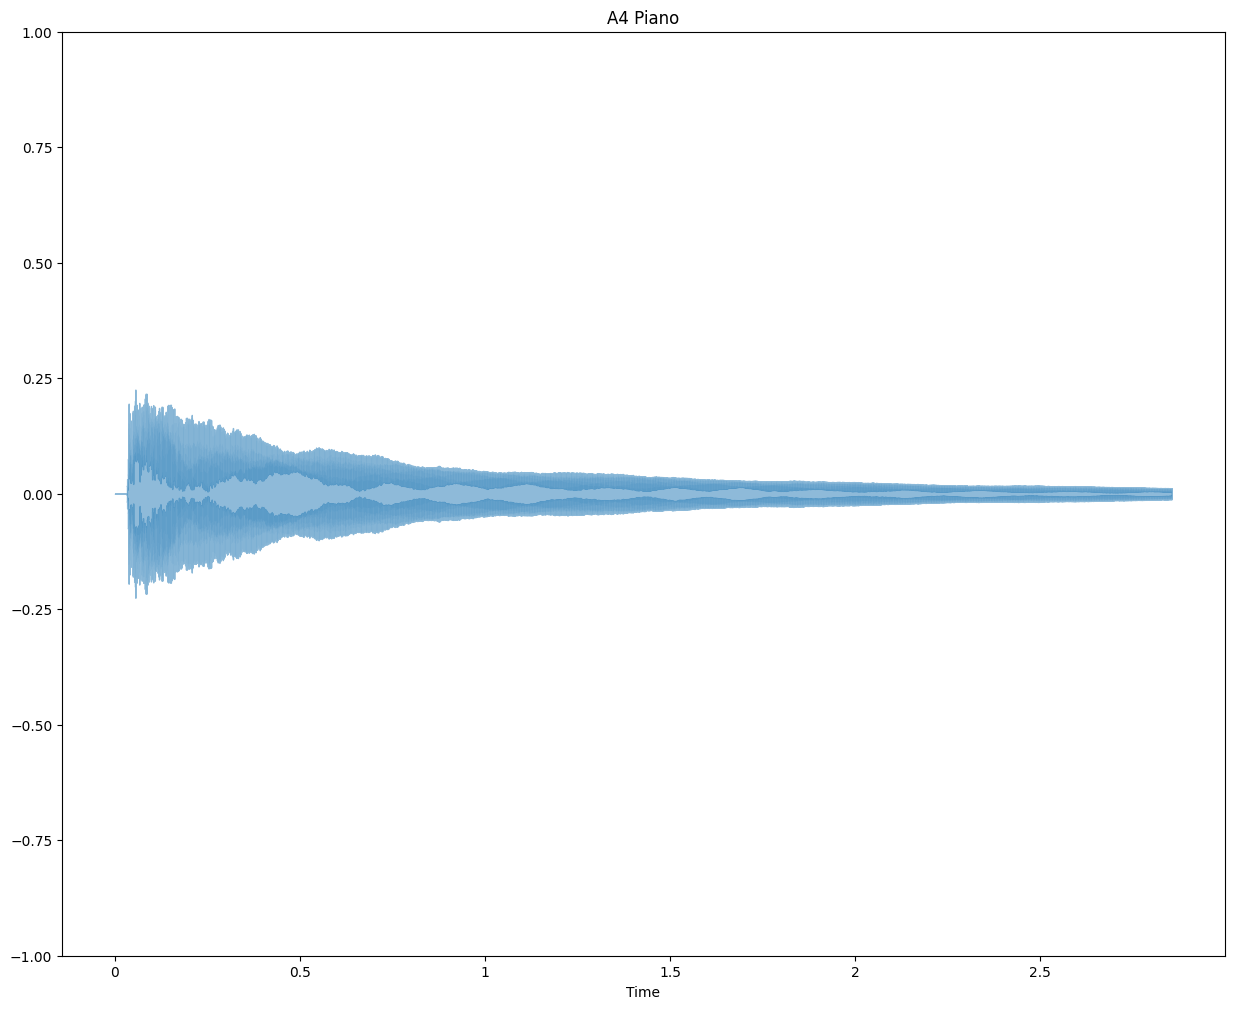

In [ ]:
plt.figure(figsize=(15, 12))

librosa.display.waveshow(a4_p, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("Time")
plt.title("A4 Piano")

In [ ]:
check = np.fft.fft(a4_p)
check.shape

(62976,)

[1.90425182 0.11359601 0.11602398 ... 0.3710415  0.11602398 0.11359601]
15744


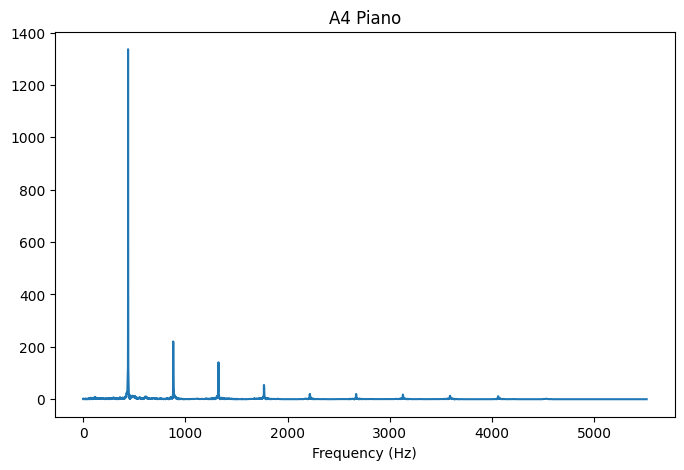

In [ ]:
plot_magnitude_spectrum(a4_p, "A4 Piano", sr_a4, 0.25)

In [ ]:
def spectogram (signal, sample_rate, frame_size, hop_size):
  s_signal = librosa.stft(signal, n_fft=frame_size, hop_length=hop_size)
  s_signal
  Y_signal = librosa.power_to_db(np.abs(s_signal)**2)
  Y_signal
  plt.figure(figsize=(12, 5))
  librosa.display.specshow(Y_signal,
                             sr=sample_rate,
                             hop_length=hop_size,
                             x_axis="time",
                             y_axis="log")
  plt.title ("frame size = {}, hop size = {}".format(frame_size, hop_size))
  plt.colorbar(format="%+2.f")

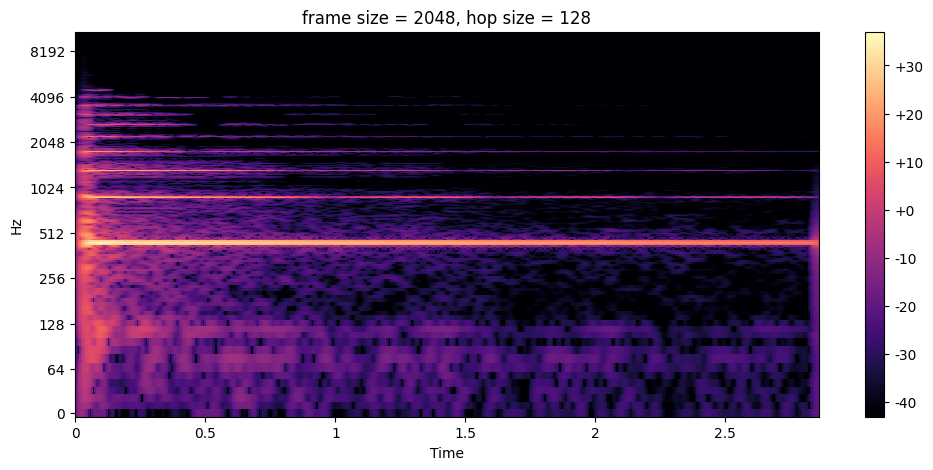

In [ ]:
spectogram(a4_p, sr_a4, 2048, 128)

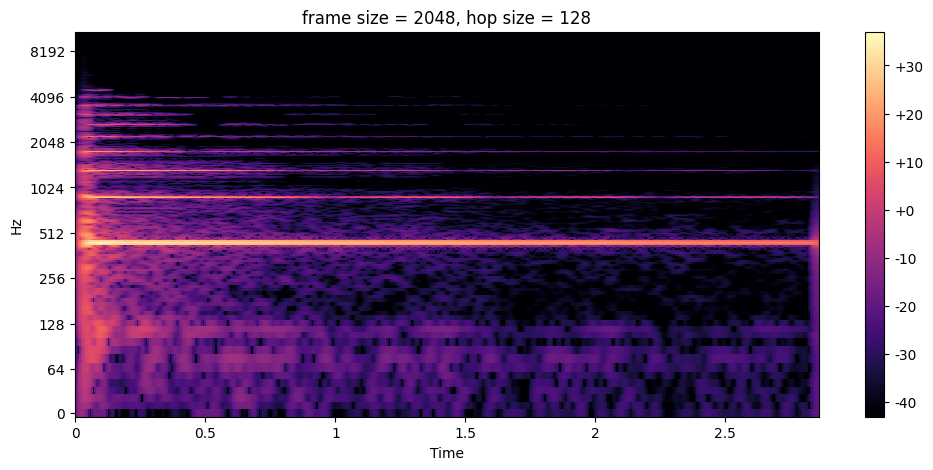

In [ ]:
spectogram(a4_p, sr_a4, 2048, 128)

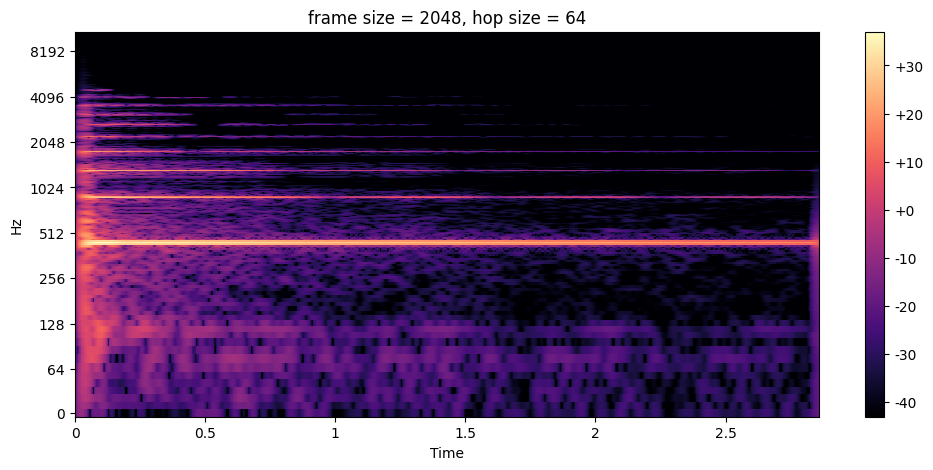

In [ ]:
spectogram(a4_p, sr_a4, 2048, 64)

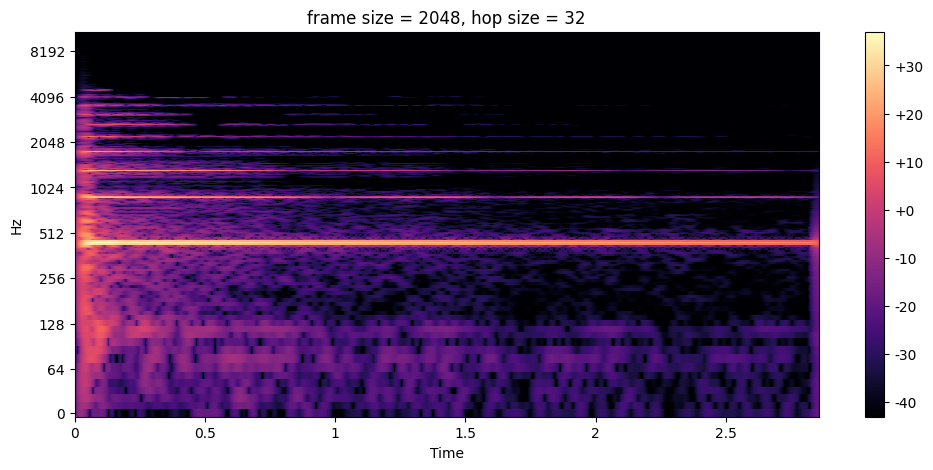

In [ ]:
spectogram(a4_p, sr_a4, 2048, 32)

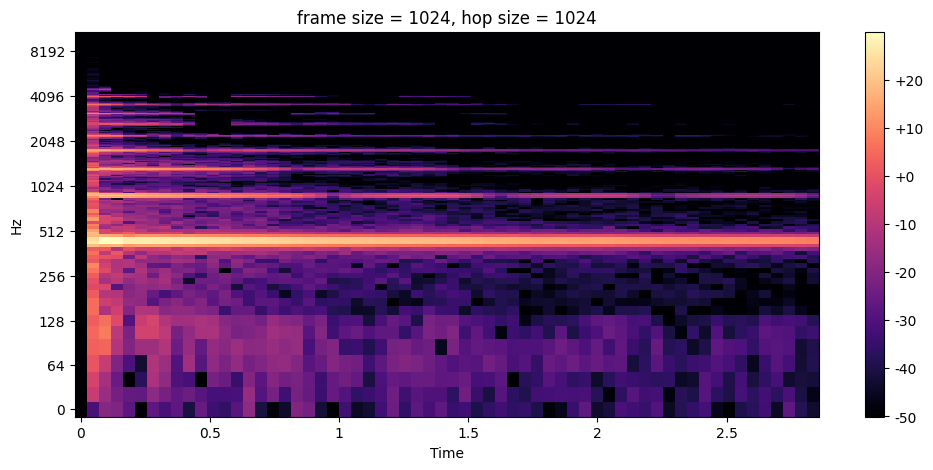

In [ ]:
spectogram(a4_p, sr_a4, 1024, 1024)

In [ ]:
# Mel spectogram
def mel_f_spectrogram(signal, signal_r=sr_a4, frame_s = 2048, hop_l = 64, n_mels=13):
  mel_spectrogram = librosa.feature.melspectrogram(y=signal,
                                                 sr=signal_r,
                                                 n_fft=frame_s,
                                                 hop_length=hop_l,
                                                 n_mels=n_mels)
  print(mel_spectrogram.shape)
  plt.figure(figsize=(13, 5))
  librosa.display.specshow(mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=signal_r)
  plt.title("Sr = {}, frame = {}, Hop ={}, ")
  plt.colorbar(format="%+2.f")
  plt.show()

(13, 985)


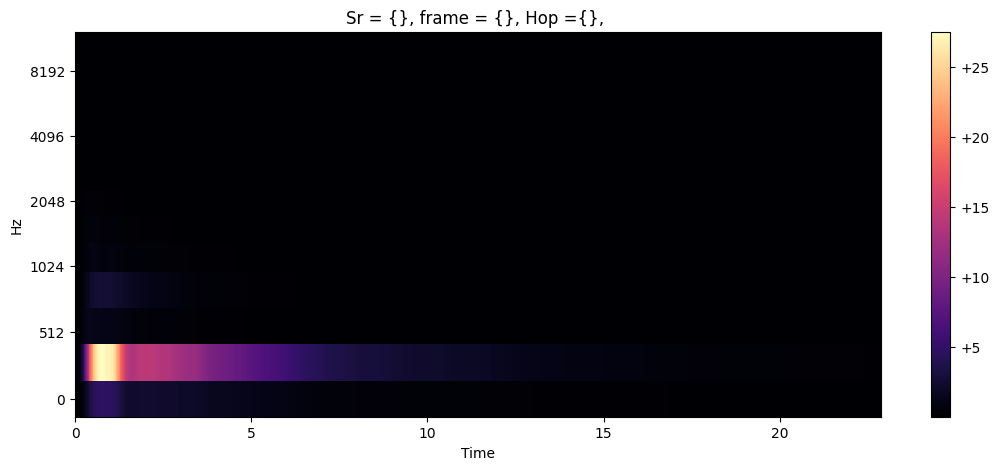

In [ ]:
mel_f_spectrogram(a4_p)

# Gelombang Sinus

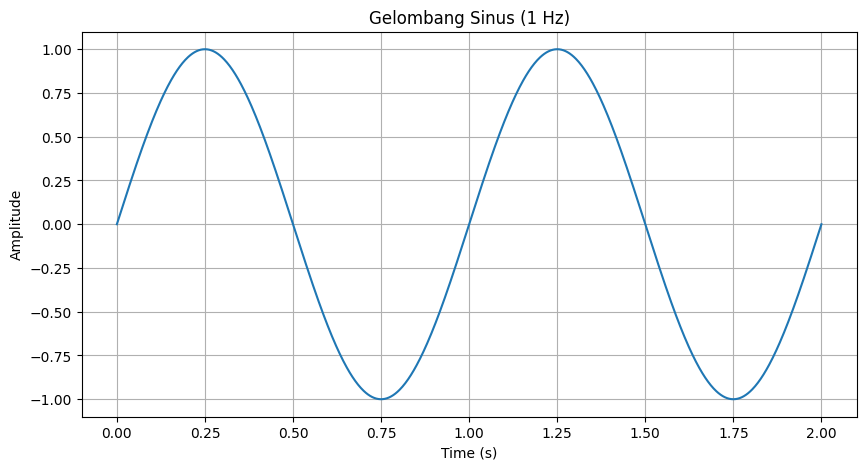

In [ ]:
# prompt: Generate a sine wave plot in time domain with frequency of 1 with 3 second duration

import numpy as np
import matplotlib.pyplot as plt

# time domain
t = np.linspace(0, 2, 1000)  # 3 seconds duration
f = 1  # frequency of 1 Hz
sine_wave = np.sin(2 * np.pi * f * t)

# plot
plt.figure(figsize=(10, 5))
plt.plot(t, sine_wave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Gelombang Sinus (1 Hz)")
plt.grid(True)
plt.show()


# Grafik sebaran data

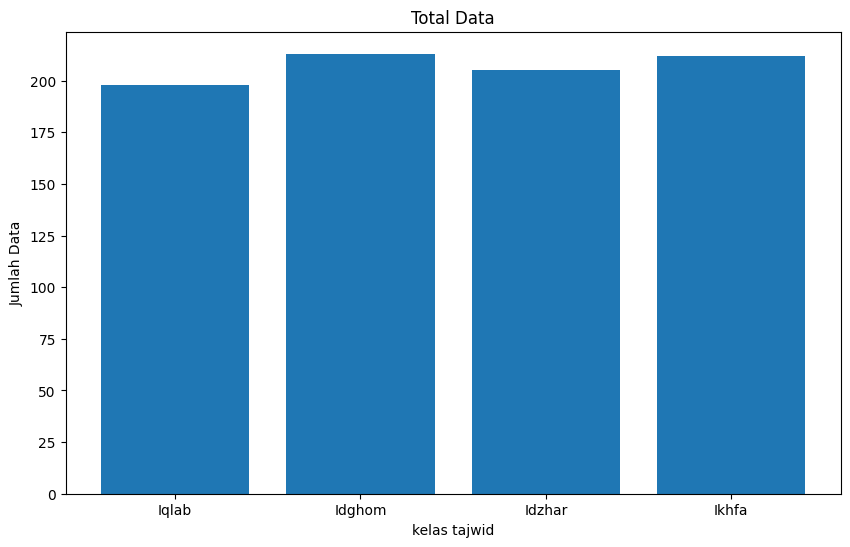

In [ ]:
# prompt: generate a bar plot to show me total data in each subfolder as the label from folder with name "data" in current directory

import os
import matplotlib.pyplot as plt

# Direktori utama
data_dir = "data"

# Hitung jumlah data di setiap subfolder
subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
data_counts = [len(os.listdir(os.path.join(data_dir, subfolder))) for subfolder in subfolders]

# Buat bar plot
plt.figure(figsize=(10, 6))
plt.bar(subfolders, data_counts)
plt.xlabel("kelas tajwid")
plt.ylabel("Jumlah Data")
plt.title("Total Data")
plt.show()


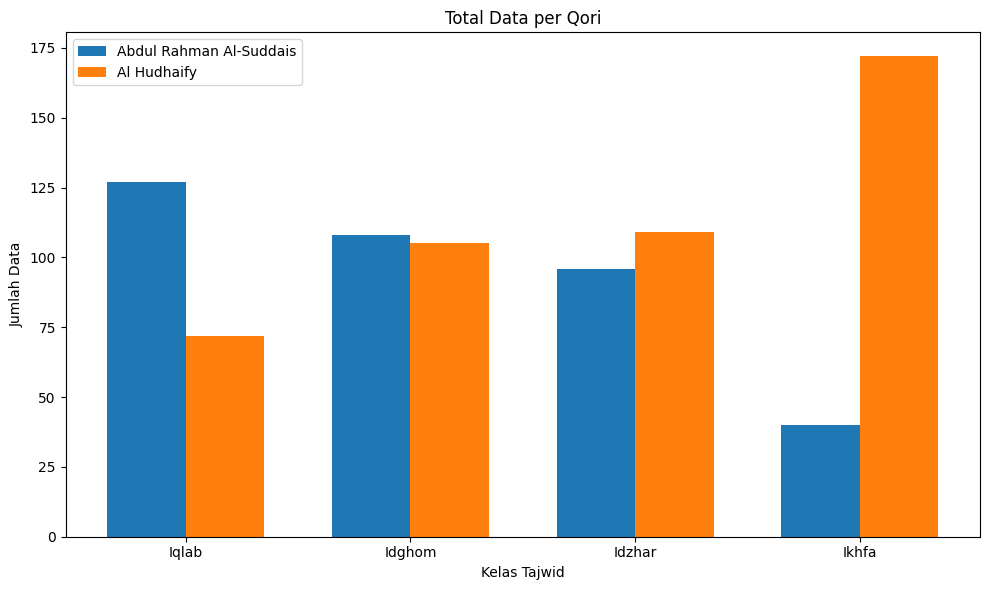

In [ ]:
# prompt: generate a bar plot to show me total data in each subfolder as the label from folder with name "data" in current directory but the data in each subfolder also has two sub category one with the name file beginning with "Abdurrahman_Suddais" and the other is not

import matplotlib.pyplot as plt
import numpy as np
# Direktori utama
data_dir = "data"

# Hitung jumlah data di setiap subfolder dan subkategori
subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
data_counts = []
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    abdurrahman_count = len([f for f in os.listdir(subfolder_path) if f.startswith("Abdurrahman_Suddais")])
    other_count = len(os.listdir(subfolder_path)) - abdurrahman_count
    data_counts.append([abdurrahman_count, other_count])

# Buat bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Lebar bar
bar_width = 0.35

# Posisi bar
index = np.arange(len(subfolders))

# Plot bar untuk setiap subkategori
rects1 = ax.bar(index, [count[0] for count in data_counts], bar_width, label="Abdul Rahman Al-Suddais")
rects2 = ax.bar(index + bar_width, [count[1] for count in data_counts], bar_width, label="Al Hudhaify")

# Label sumbu x
ax.set_xlabel("Kelas Tajwid")
ax.set_ylabel("Jumlah Data")
ax.set_title("Total Data per Qori")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(subfolders)
ax.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


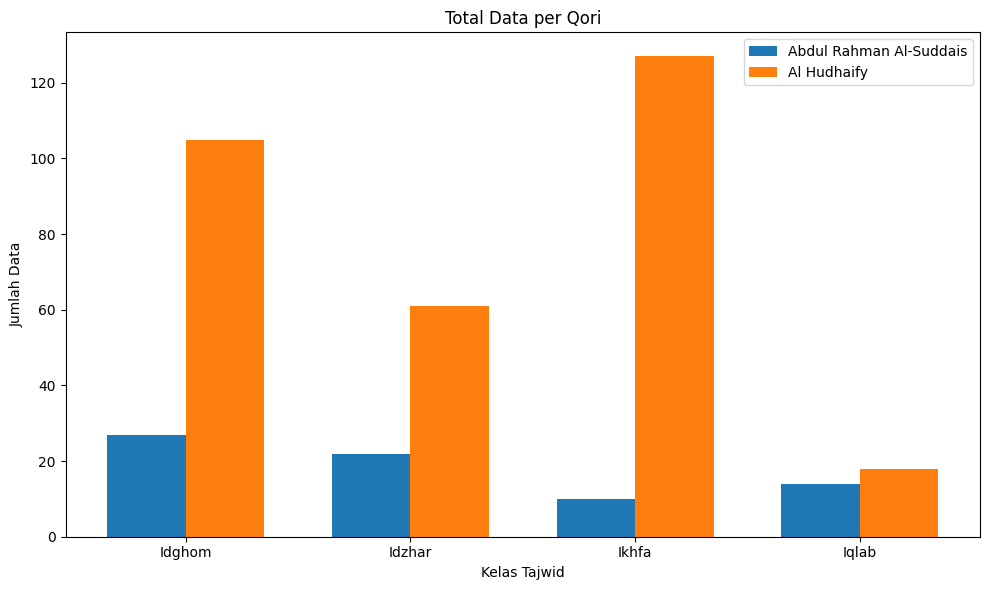

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Direktori utama
data_dir = "data_awal"

# Hitung jumlah data di setiap subfolder dan subkategori
subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
data_counts = []
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    abdurrahman_count = len([f for f in os.listdir(subfolder_path) if f.startswith("Abdurrahman_Suddais")])
    other_count = len(os.listdir(subfolder_path)) - abdurrahman_count
    data_counts.append([abdurrahman_count, other_count])

# Buat bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Lebar bar
bar_width = 0.35

# Posisi bar
index = np.arange(len(subfolders))

# Plot bar untuk setiap subkategori
rects1 = ax.bar(index, [count[0] for count in data_counts], bar_width, label="Abdul Rahman Al-Suddais")
rects2 = ax.bar(index + bar_width, [count[1] for count in data_counts], bar_width, label="Al Hudhaify")

# Label sumbu x
ax.set_xlabel("Kelas Tajwid")
ax.set_ylabel("Jumlah Data")
ax.set_title("Total Data per Qori")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(subfolders)
ax.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

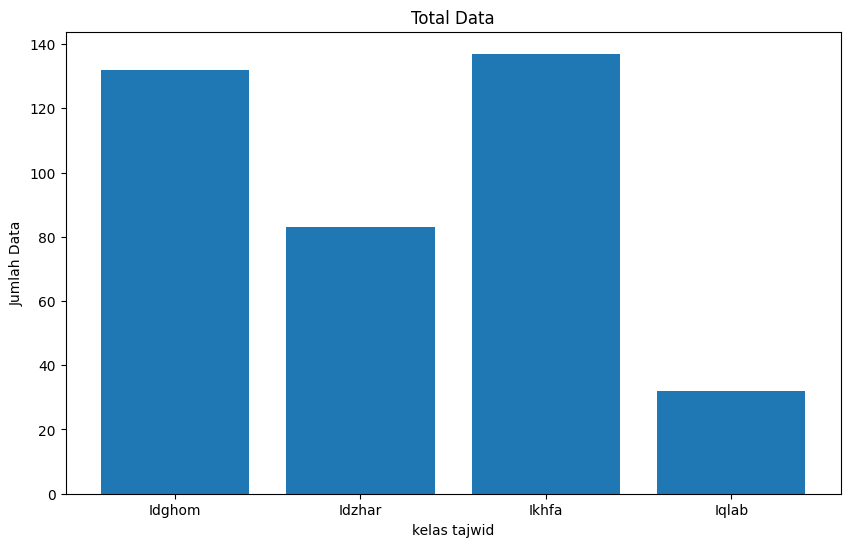

In [ ]:
import os
import matplotlib.pyplot as plt

# Direktori utama
data_dir = "data_awal"

# Hitung jumlah data di setiap subfolder
subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
data_counts = [len(os.listdir(os.path.join(data_dir, subfolder))) for subfolder in subfolders]

# Buat bar plot
plt.figure(figsize=(10, 6))
plt.bar(subfolders, data_counts)
plt.xlabel("kelas tajwid")
plt.ylabel("Jumlah Data")
plt.title("Total Data")
plt.show()


In [ ]:
# prompt: delete each files has name ended with "_stretch_shift" or "_shift" or "_stretch" from subfolder in "data_awal" folder

import os

data_dir = "data_awal"

for subfolder in os.listdir(data_dir):
  subfolder_path = os.path.join(data_dir, subfolder)
  if os.path.isdir(subfolder_path):
    for file in os.listdir(subfolder_path):
      if file.endswith("_stretch_shift.wav") or file.endswith("_shift.wav") or file.endswith("_stretch.wav"):
        file_path = os.path.join(subfolder_path, file)
        os.remove(file_path)
        print(f"File {file_path} telah dihapus.")


File data_awal/Idghom/Abdurrahman_Suddais_idghom_4_stretch.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_4_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_4_stretch_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_5_stretch.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_5_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_5_stretch_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_6_stretch.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_6_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_6_stretch_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_7_stretch.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_7_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom_7_stretch_shift.wav telah dihapus.
File data_awal/Idghom/Abdurrahman_Suddais_idghom

# perbedaan nilai koefisien MFCC


In [38]:
def simpan_hasil_MFCC (signal, json_path, sample_rate=sr, num_mfcc=13, n_fft=2048, hop_length=256):
  data = {
        "nama": [],
        "mfcc": []
        }
  signal, sample_rate = librosa.load(signal)

            # perlu zero padding menjadi 3 detik
  padded_audio = librosa.util.fix_length(signal, size=3*sample_rate)
  mfcc = librosa.feature.mfcc(y=padded_audio, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
  mfcc = mfcc.T

  data["mfcc"].append(mfcc.tolist())
  data["nama"].append("idghom")

  with open(json_path, "w") as fp:
      json.dump(data, fp, indent=4)

In [39]:
simpan_hasil_MFCC("idghom_7_23_002002_2_E♭_minor__bpm_65.wav", "idghom.json")

In [40]:
simpan_hasil_MFCC("idghom_7_23_002002_2.wav", "idghom ori.json")